In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [2]:
#reading the dataset
df = pd.read_csv('TelcomCustomer-Churn.csv')
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
#checking info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [6]:
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [7]:
#checking the percentage of missing values in each columns
df.isnull().sum()/len(df)*100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

- There are no missing values in the columns.

In [8]:
len(df[df.duplicated()])

0

- There are no duplicates in the dataset

In [9]:
#dropping redundant column
df.drop('customerID', axis=1, inplace=True)

In [10]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [35]:
#initialize label encoder
lbl_enc = LabelEncoder()

In [36]:
#encode the categorical column
object_type_variables = [i for i in df[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
      'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
      'PaymentMethod', 'TotalCharges', 'Churn']] if df.dtypes[i]==object]
def encoder(df):
    for i in object_type_variables:
        q=lbl_enc.fit_transform(df[i].astype(str))
        df[i]=q
        df[i]=df[i].astype(int)
encoder(df)

In [37]:
df['TotalCharges'] = df['TotalCharges'].replace(" ","0.0")

In [38]:
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [39]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505.0,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466.0,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157.0,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400.0,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925.0,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,6104.0,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1550.0,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,2609.0,0
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,2646.0,1
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3022.0,0


- converting all data into numerical format.

## 1. Univariate Analysis

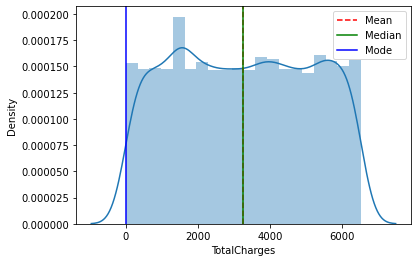

Mean: 3257.7941218230867
Median: 3249.0
Mode: 0.0


In [40]:
#Let us understand the distribution of the columns "TotalCharges"
mean=df['TotalCharges'].mean()
median=df['TotalCharges'].median()
mode=df['TotalCharges'].mode().values[0]

sns.distplot(df['TotalCharges'])
plt.axvline(mean, color='r', linestyle='--', label='Mean')
plt.axvline(median, color='g', linestyle='-', label='Median')
plt.axvline(mode, color='b', linestyle='-', label='Mode')
plt.legend()
plt.show()
print('Mean:', mean)
print('Median:', median)
print('Mode:', mode)

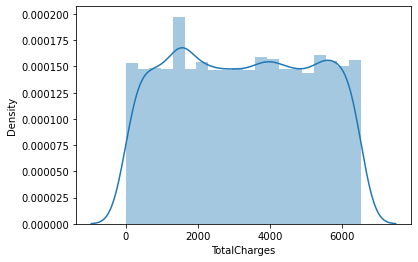

In [41]:
sns.distplot(df['TotalCharges'])
plt.show()

- Most of the records fall between 0 to 2000

## 2. Bivariate Analysis

In [23]:
#create a correlation matrix of data
corr_matrix = df[['MonthlyCharges', 'TotalCharges', 'Churn', 'tenure']].corr()
corr_matrix

,MonthlyCharges,TotalCharges,Churn,tenure
MonthlyCharges,1.000000,0.279875,0.193356,0.247900
TotalCharges,0.279875,1.000000,0.014479,0.158523
Churn,0.193356,0.014479,1.000000,-0.352229
tenure,0.247900,0.158523,-0.352229,1.000000


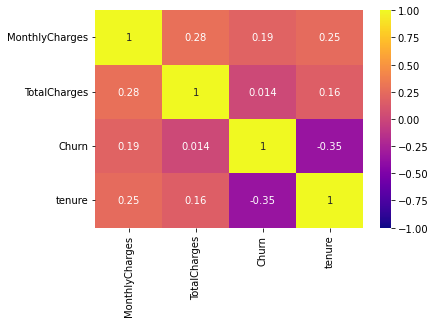

In [24]:
#heatmap helps in visualising correlation amongst features
sns.heatmap(corr_matrix, annot=True, cmap='plasma', vmin=-1, vmax=1)
plt.show()

- Total charges and Churn has the lowest correlation.
- Total Charges and Monthly Charges have the maximum correlation.

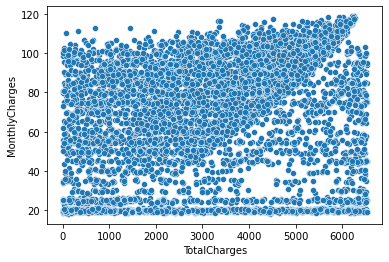

In [28]:
sns.scatterplot(df['TotalCharges'], df['MonthlyCharges'])
plt.show()

## 3. Multivariate Analysis

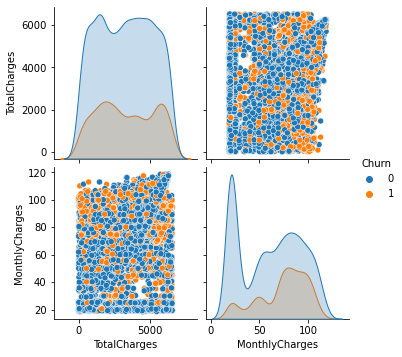

In [29]:
df_pairplot = df[['TotalCharges', 'MonthlyCharges', 'Churn']]
sns.pairplot(df_pairplot, hue='Churn')
plt.show()

### Data preparation for model building

In [31]:
#store the target variable i.e, Churn in y variable and the rest in x variable
df1 = df.copy()

#i) Encode the categorical column
df1=pd.get_dummies(df, drop_first=True)
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5317,0,0,0,0,6,1,0,0,0,0,0,2,0,0,0,1,0,49.65,2323.0,1
892,1,1,0,0,32,1,2,1,0,0,2,0,0,0,0,1,1,81.10,2266.0,0
6179,0,1,0,0,11,1,2,1,0,0,0,0,2,2,0,1,0,95.15,6525.0,1
3477,0,0,0,0,18,1,2,1,0,0,0,0,0,0,0,1,2,74.15,629.0,0
714,1,0,1,0,72,1,2,2,1,1,1,1,1,1,2,0,3,25.40,1212.0,0


In [32]:
#ii) store the target variable in y variable and the rest in x variable
X = df1[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']]
y=df1['Churn']

In [49]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [50]:
#scale only numerical features reviews and ratings using Standard Scaler
sc = StandardScaler()

df_scaled = df1.copy()
df_scaled.iloc[:,:2] = sc.fit_transform(df_scaled.iloc[:,:2])
df_scaled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,-1.009559,-0.439916,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505.0,0
1,0.990532,-0.439916,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466.0,0
2,0.990532,-0.439916,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157.0,1
3,0.990532,-0.439916,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400.0,0
4,-1.009559,-0.439916,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925.0,1


In [51]:
#standarised the column using z-score approach
df_zscore = (df - df.mean())/df.std()
df_zscore.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03
mean,-3.278807e-18,-5.397815e-16,-1.770083e-16,-4.658113e-16,-2.616740e-18,-1.486829e-15,-2.702336e-16,-1.753768e-16,-6.144611e-17,3.398610e-17,-4.700675e-16,2.779735e-16,-1.350932e-16,5.641755e-16,-8.045688e-17,-1.756999e-16,-1.247208e-15,-1.426628e-15,5.006486e-17,-6.509536e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.009487e+00,-4.398853e-01,-9.665537e-01,-6.539655e-01,-1.318071e+00,-3.053794e+00,-9.915179e-01,-1.183150e+00,-9.187725e-01,-1.029846e+00,-1.027837e+00,-9.251964e-01,-1.113416e+00,-1.121326e+00,-8.281481e-01,-1.205028e+00,-1.473947e+00,-1.545750e+00,-1.724893e+00,-6.009808e-01
25%,-1.009487e+00,-4.398853e-01,-9.665537e-01,-6.539655e-01,-9.516141e-01,3.274151e-01,-9.915179e-01,-1.183150e+00,-9.187725e-01,-1.029846e+00,-1.027837e+00,-9.251964e-01,-1.113416e+00,-1.121326e+00,-8.281481e-01,-1.205028e+00,-5.377090e-01,-9.724708e-01,-8.729813e-01,-6.009808e-01
50%,9.904615e-01,-4.398853e-01,-9.665537e-01,-6.539655e-01,-1.372647e-01,3.274151e-01,6.271830e-02,1.722380e-01,2.442244e-01,1.063077e-01,1.085925e-01,2.355016e-01,1.652477e-02,8.502182e-03,-8.281481e-01,8.297386e-01,3.985294e-01,1.857195e-01,-4.656193e-03,-6.009808e-01
75%,9.904615e-01,-4.398853e-01,1.034457e+00,1.528916e+00,9.213896e-01,3.274151e-01,1.116954e+00,1.722380e-01,1.407221e+00,1.242462e+00,1.245022e+00,1.396200e+00,1.146466e+00,1.138330e+00,3.712447e-01,8.297386e-01,3.985294e-01,8.337743e-01,8.702873e-01,1.663710e+00
max,9.904615e-01,2.272997e+00,1.034457e+00,1.528916e+00,1.613587e+00,3.274151e-01,1.116954e+00,1.527626e+00,1.407221e+00,1.242462e+00,1.245022e+00,1.396200e+00,1.146466e+00,1.138330e+00,1.570637e+00,8.297386e-01,1.334768e+00,1.794225e+00,1.732524e+00,1.663710e+00


# Model Building and Evaluation

11. Write a function
- Which can take the model and data as inputs.
- Fit the model with the train data.
- Make predictions on the test set.
- Returns the accuracy score.

In [52]:
def fit_n_print(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)
    return accuracy

-  Use the function and train a Logistic regression, KNN, and Naive Bayes, Decision tree, Random forest, Boosting and Stacking Classifier models and make predictions on test data.


In [53]:
##Initialize the models

lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

estimators = [('rf', rf), ('knn', knn), ('dt', dt), ('nb', nb)]
stc = StackingClassifier(estimators=estimators, final_estimator=rf)

In [54]:
result = pd.DataFrame(columns = ['Accuracy'])

for model, model_name in zip([lr, nb, knn, dt, rf, stc], 
                             ['Logistic Regression', 'Naive Bayes', 'KNN', 'Decision Tree', 'Random Forest',
                             'Stacking']):
    result.loc[model_name] = fit_n_print(model, X_train, X_test, y_train, y_test)

In [55]:
result

,Accuracy
Logistic Regression,0.795078
Naive Bayes,0.755324
KNN,0.744912
Decision Tree,0.730241
Random Forest,0.782300
Stacking,0.749172


# Select the final best trained model

<AxesSubplot:>

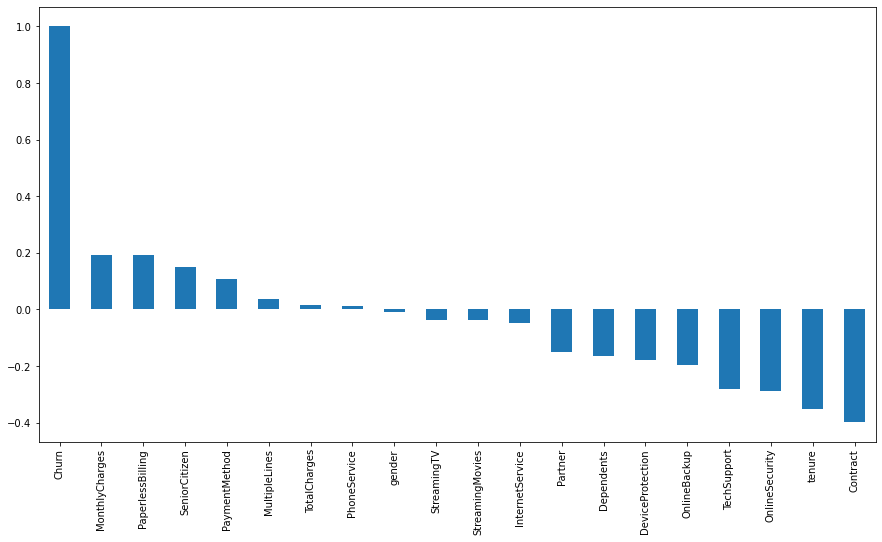

In [56]:
#get correlation of churn with other variable
df_dummies = pd.get_dummies(df)
plt.figure(figsize=(15, 8))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

In [60]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns=['Churn'])

#scaling all the variable in the range 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [61]:
#create train and test the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [62]:
#running logistic regression model
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [63]:
from sklearn import metrics
prediction_test = model.predict(X_test)

#print hte prediction accuracy
print(metrics.accuracy_score(y_test, prediction_test))

0.8064363464268812


AxesSubplot(0.125,0.125;0.775x0.755)


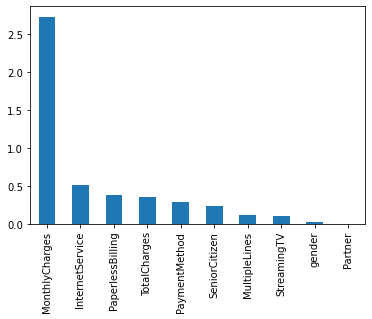

In [64]:
#to get the weights of all the variable
weights = pd.Series(model.coef_[0], index=X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

- From Model:-
   - It is important to scale the variables in logistic regression so that all of them are within a range of 0 to 1.
   - We see that the best performing models are Logistic Regression and Random forest with nearly 80% accuracy.
   - We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive            relation. Negative relation means that likeliness of churn decreases with that variable.
   - Having a 2 month contract reduces chances of churn. 2 month contract along with tenure have the most negative relation          with Churn as predicted by logistic regressions
   - Having DSL internet service also reduces the proability of Churn

# Conclusions:

### - Let’s try to summarise some of the key findings from this EDA:

 - The dataset does not have any missing or erroneous data values.
 - Strongest positive correlation with the target features is Monthly Charges and Age whilst negative correlation is with          Partner, Dependents and Tenure.
 - The dataset is imbalanced with the majority of customers being active.
 - There is multicollinearity between Monthly Charges and Total Charges.
 - Most of the customers in the dataset are younger people.
 - There are a lot of new customers in the organization (less than 10 months old) followed by a loyal customer base that’s        above 70 months old.
 - Most of the customers seem to have phone service with Monthly charges spanning between 18 to 118 per customer.
 - Customers with a month-to-month connection have a very high probability to churn that too if they have subscribed to pay via    electronic checks.